<a href="https://colab.research.google.com/github/depanshu357/TrackIT-grp9/blob/main/Copy_of_Copy_of_CS253PythonAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import pandas as pd
import numpy as np

1. Numpy                          // Data Storage and manipulation
2. Pandas                         // Data Storage and manipulation
3. scikit-learn                    // only for SVM, KNN  and PCA
4. matplotlib                      // Use extensively for Visualization
5. seaborn                         // Use extensively for Visualization
6. imblearn                        // only for SMOTE or ADASYN


In [76]:
df  = pd.read_csv('kag_risk_factors_cervical_cancer.csv',header = 0, na_values='?')
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [77]:
null_counts = df.isnull().sum()
null_counts

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [78]:
# Drop columns by column name
df = df.drop(['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], axis=1)

# Save the modified DataFrame to a new CSV file
# df.to_csv('new_file.csv', index=False)
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [79]:
null_counts = df.isnull().sum()
null_counts

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [80]:
df = df.astype('float')
df.dtypes

Age                                   float64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                float64
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives               float64
Hormonal Contraceptives (years)       float64
IUD                                   float64
IUD (years)                           float64
STDs                                  float64
STDs (number)                         float64
STDs:condylomatosis                   float64
STDs:cervical condylomatosis          float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:pelvic inflammatory disease      float64
STDs:genital herpes                   float64
STDs:molluscum contagiosum            float64
STDs:AIDS                         

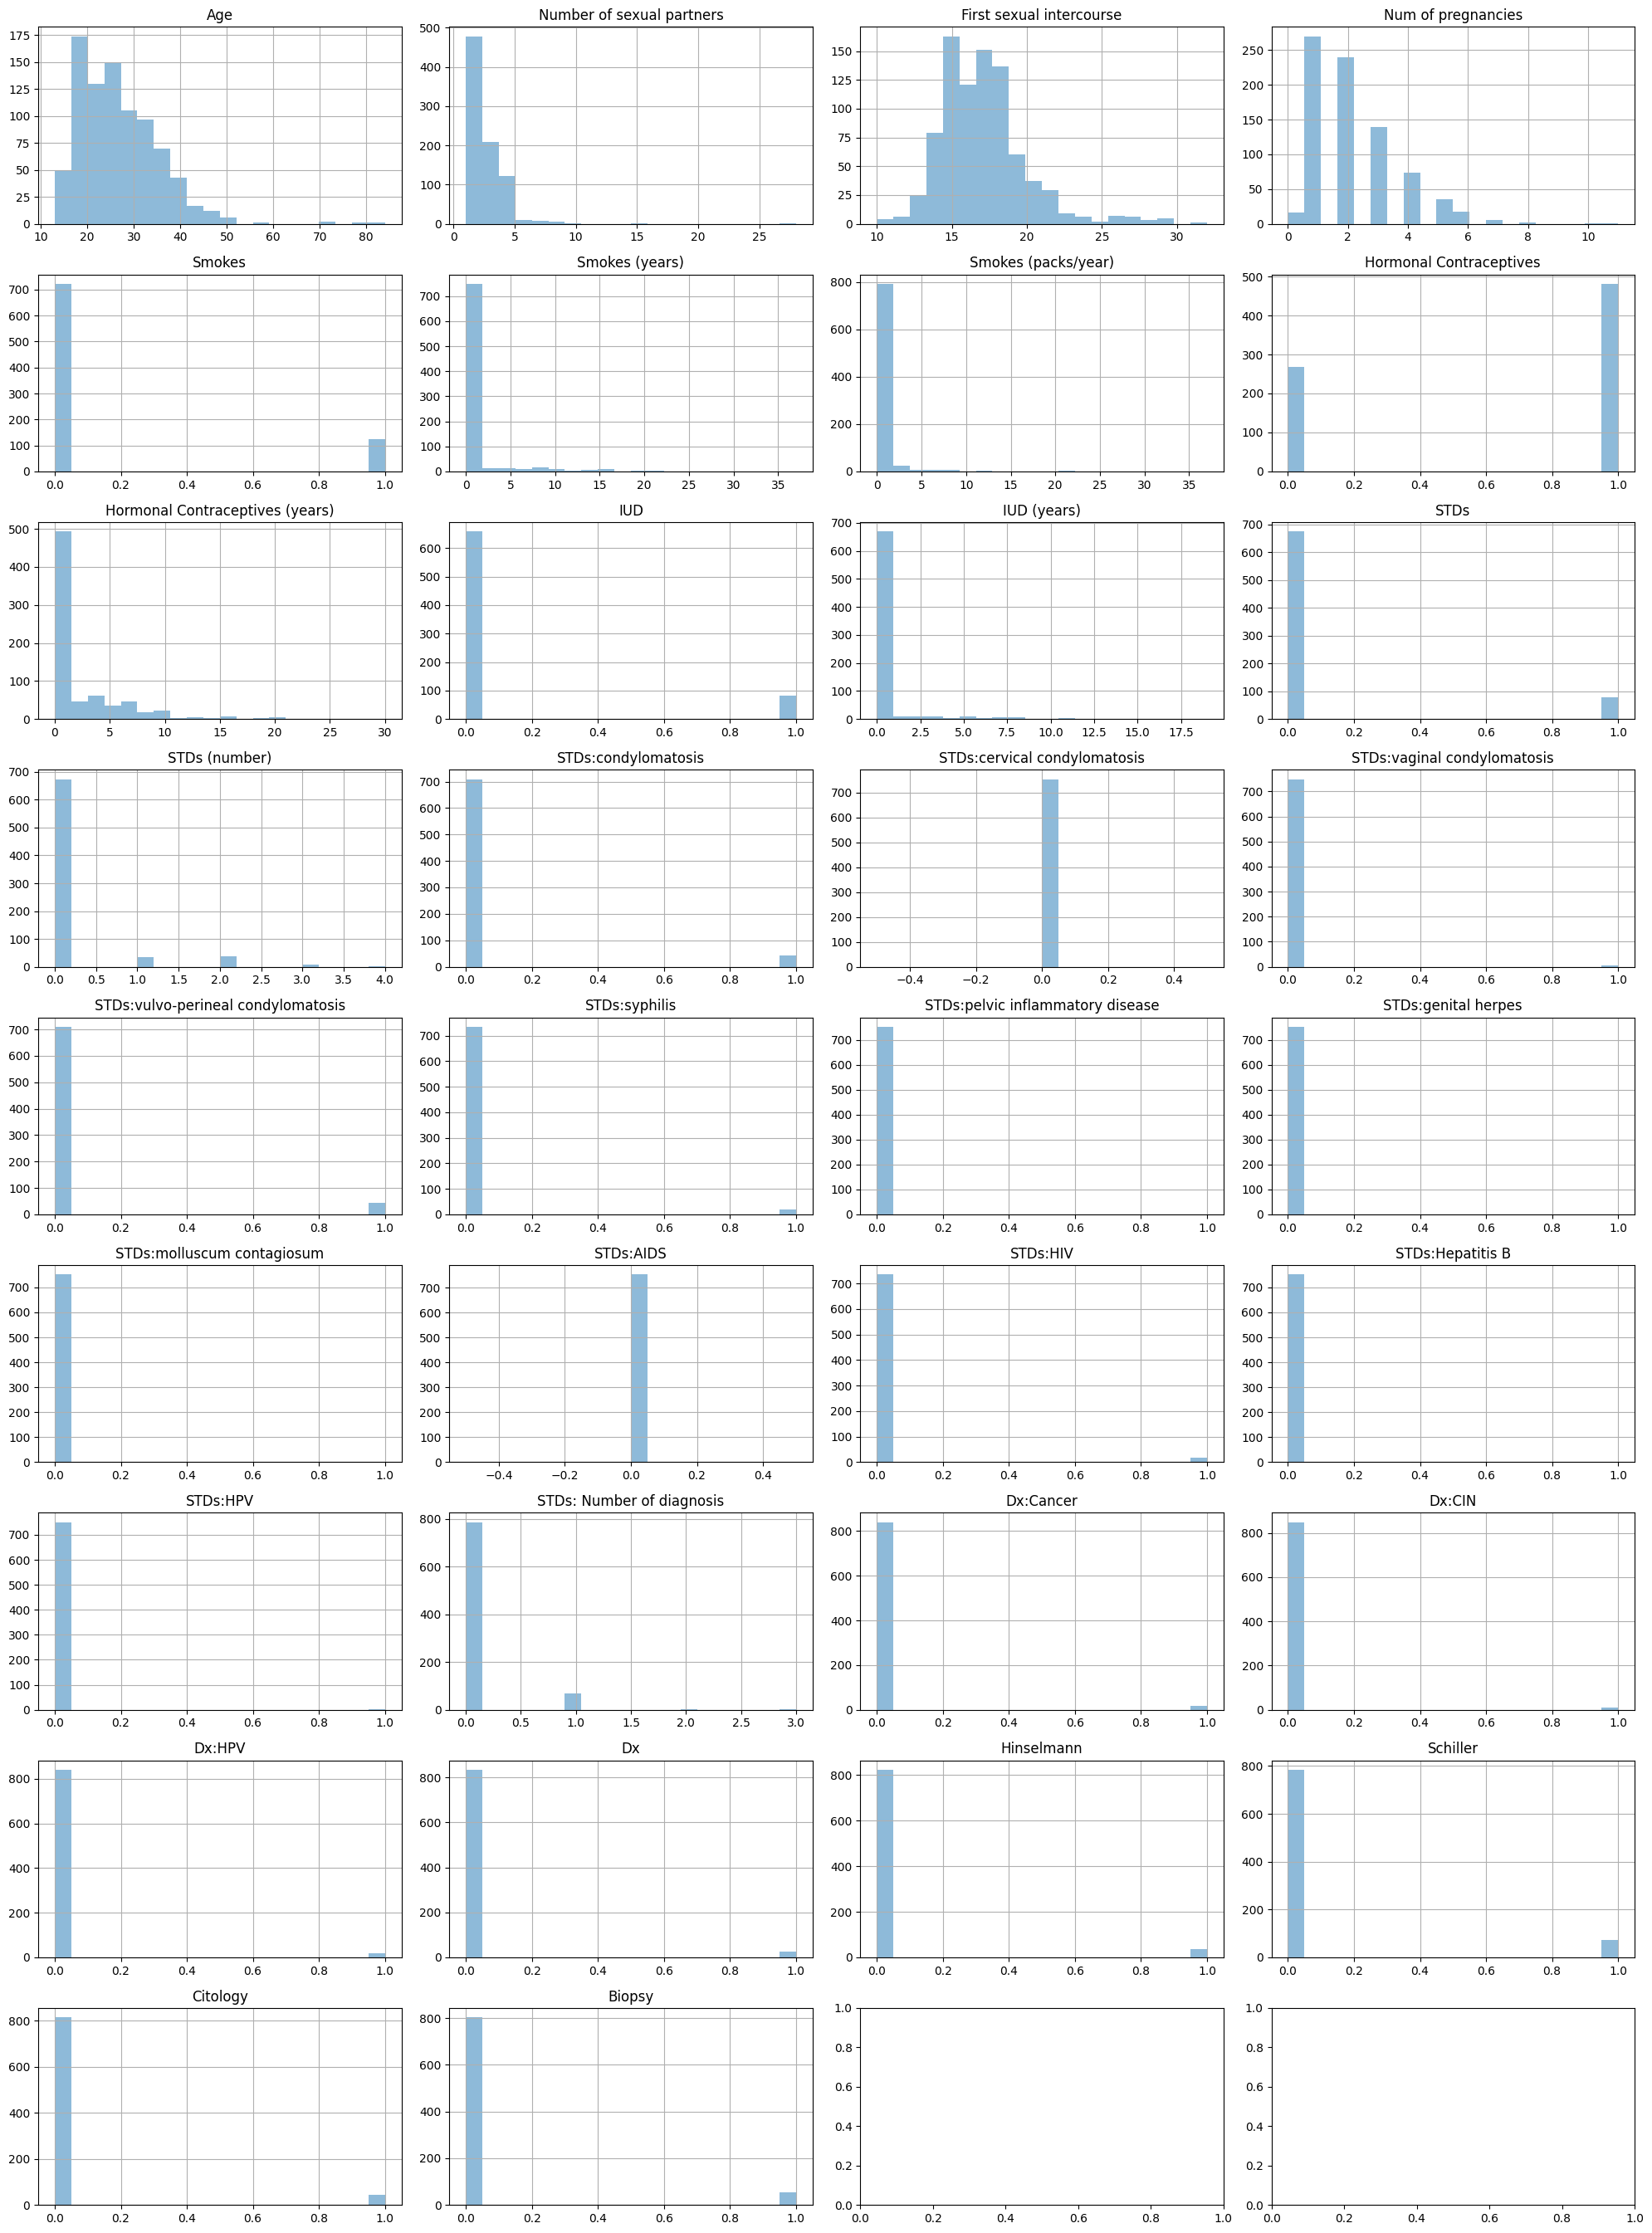

In [81]:
import matplotlib.pyplot as plt

nrows = int(np.ceil(len(df.columns) / 4))
ncols = 4

# Create a figure with subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, nrows*3))

# Flatten the array of subplots
axes = axes.flatten()

# Iterate over the columns and plot a histogram for each one
for i, col in enumerate(df.columns):
    df[col].hist(bins=20, ax=axes[i], alpha=0.5)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [82]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
for col in df.columns:
  df[col] = scaler.fit_transform(df[[col]])
# Normalize the 'col_name' column of the dataframe 'df'
#df['col_name'] = scaler.fit_transform(df[['col_name']])

In [83]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,0.070423,0.111111,0.227273,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.028169,0.000000,0.181818,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.295775,0.000000,NaN,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.549296,0.148148,0.272727,0.363636,1.0,1.0,1.0,1.0,0.1,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.464789,0.074074,0.500000,0.363636,0.0,0.0,0.0,1.0,0.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
null_counts = df.isnull().sum()
null_counts

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [85]:
columns_to_replace = ['Number of sexual partners' ,	'First sexual intercourse',	'Num of pregnancies',	'Smokes',	'Smokes (years)',	'Smokes (packs/year)']
# replace null values in a particular column with mode
for cols in columns_to_replace:
  df[cols].fillna(df[cols].mode()[0], inplace=True)

In [86]:
null_counts = df.isnull().sum()
null_counts

Age                                     0
Number of sexual partners               0
First sexual intercourse                0
Num of pregnancies                      0
Smokes                                  0
Smokes (years)                          0
Smokes (packs/year)                     0
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [87]:
from sklearn.impute import KNNImputer

# create an imputer object with the chosen imputation strategy
imputer = KNNImputer(n_neighbors=3)

# impute missing values in the DataFrame
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [88]:
null_count = df.isnull().sum()
null_count

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [89]:
outlier_columns = ['Age','Number of sexual partners','First sexual intercourse','Num of pregnancies','Smokes','Smokes (years)','Smokes (packs/year)','Hormonal Contraceptives','Hormonal Contraceptives (years)','IUD','IUD (years)','STDs','STDs (number)','STDs:condylomatosis','STDs:cervical condylomatosis','STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis','STDs:syphilis','STDs:pelvic inflammatory disease','STDs:genital herpes','STDs:molluscum contagiosum','STDs:AIDS','STDs:HIV','STDs:Hepatitis B','STDs:HPV','STDs: Number of diagnosis','Dx:Cancer','Dx:CIN','Dx:HPV','Dx']
# def remove_outliers(df, col):
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - (1.5 * IQR)
#     upper_bound = Q3 + (1.5 * IQR)
#     return df.loc[(df[col] > lower_bound) & (df[col] < upper_bound)]
# for col in outlier_columns:
#     df = remove_outliers(df,col)
from scipy import stats
# for col in outlier_columns:
#       temp = stats.zscore(df[col])
#       df = df[abs(temp) < 3]
z_scores = df.apply(lambda x: (x - x.mean()) / x.std())
outlier_threshold = 3 # set the z-score threshold
#df = df[(z_scores > outlier_threshold) | (z_scores < -outlier_threshold)]
df = df[(z_scores <= outlier_threshold) | (z_scores >= -outlier_threshold)]

num_outliers = ((z_scores > outlier_threshold) | (z_scores < -outlier_threshold)).sum()
print('Number of outliers in each column:')
for col_name, num in num_outliers.iteritems():
    print(f"{col_name}: {num}")

Number of outliers in each column:
Age: 5
Number of sexual partners: 8
First sexual intercourse: 22
Num of pregnancies: 10
Smokes: 0
Smokes (years): 27
Smokes (packs/year): 14
Hormonal Contraceptives: 0
Hormonal Contraceptives (years): 19
IUD: 0
IUD (years): 28
STDs: 79
STDs (number): 45
STDs:condylomatosis: 44
STDs:cervical condylomatosis: 0
STDs:vaginal condylomatosis: 4
STDs:vulvo-perineal condylomatosis: 43
STDs:syphilis: 18
STDs:pelvic inflammatory disease: 1
STDs:genital herpes: 2
STDs:molluscum contagiosum: 1
STDs:AIDS: 0
STDs:HIV: 18
STDs:Hepatitis B: 1
STDs:HPV: 2
STDs: Number of diagnosis: 71
Dx:Cancer: 18
Dx:CIN: 9
Dx:HPV: 18
Dx: 24
Hinselmann: 35
Schiller: 74
Citology: 44
Biopsy: 55


<ipython-input-89-9046dd626f2b>:22: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, num in num_outliers.iteritems():


In [90]:
null_counts = df.isnull().sum()
null_counts

Age                                     0
Number of sexual partners               0
First sexual intercourse                0
Num of pregnancies                      0
Smokes                                  0
Smokes (years)                          0
Smokes (packs/year)                     0
Hormonal Contraceptives                 0
Hormonal Contraceptives (years)         0
IUD                                     0
IUD (years)                             0
STDs                                    0
STDs (number)                           0
STDs:condylomatosis                     0
STDs:cervical condylomatosis          858
STDs:vaginal condylomatosis             0
STDs:vulvo-perineal condylomatosis      0
STDs:syphilis                           0
STDs:pelvic inflammatory disease        0
STDs:genital herpes                     0
STDs:molluscum contagiosum              0
STDs:AIDS                             858
STDs:HIV                                0
STDs:Hepatitis B                  

In [91]:
df = df.drop(['STDs:cervical condylomatosis', 'STDs:AIDS'], axis=1)
df.isnull().sum()



Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0
STDs: Number of diagnosis             0
Dx:Cancer                             0


In [92]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

test = df.copy()
test = test.drop(['Hinselmann','Biopsy','Schiller'],axis=1)
X = test.drop('Citology', axis=1)
y = test['Citology']
smote = SMOTE(random_state=40)
# X_resampled, y_resampled = smote.fit_resample(X, y)
# Split the resampled data into train and test sets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.decomposition import PCA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train_resampled,y_train_resampled = smote.fit_resample(X,y)
pca = PCA(n_components=26)
X_train_pca = pca.fit_transform(X_train_resampled)

# Train SVM
svm_model = SVC()
svm_model.fit(X_train_pca, y_train_resampled)

X_test_pca = pca.transform(X_test)
svm_preds = svm_model.predict(X_test_pca)
# Train KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_pca, y_train_resampled)
X_test_pca = pca.transform(X_test)

#predictions
knn_preds = knn_model.predict(X_test_pca)


# Calculate accuracy, precision, and recall for SVM
svm_accuracy = accuracy_score(y_test, svm_preds)
svm_precision = precision_score(y_test, svm_preds)
svm_recall = recall_score(y_test, svm_preds)

# Calculate accuracy, precision, and recall for KNN
knn_accuracy = accuracy_score(y_test, knn_preds)
knn_precision = precision_score(y_test, knn_preds)
knn_recall = recall_score(y_test, knn_preds)

# Print the results
print("SVM results:")
print("Accuracy: {:.4f}".format(svm_accuracy))
print("Precision: {:.4f}".format(svm_precision))
print("Recall: {:.4f}".format(svm_recall))
print()
print("KNN results:")
print("Accuracy: {:.4f}".format(knn_accuracy))
print("Precision: {:.4f}".format(knn_precision))
print("Recall: {:.4f}".format(knn_recall))


SVM results:
Accuracy: 0.7035
Precision: 0.0755
Recall: 0.6667

KNN results:
Accuracy: 0.8488
Precision: 0.1875
Recall: 1.0000


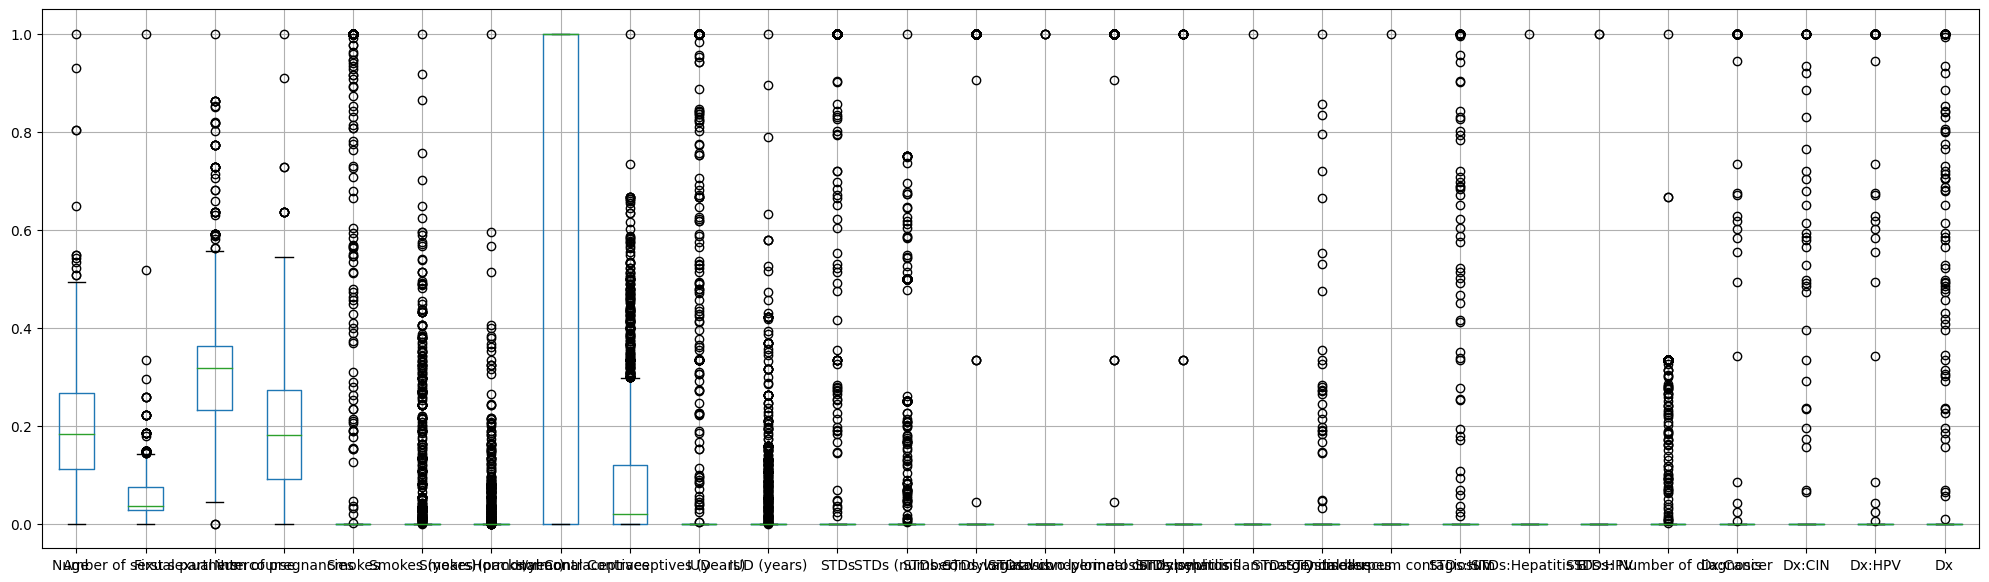

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25, 7))
X_train_resampled.boxplot()
plt.show()

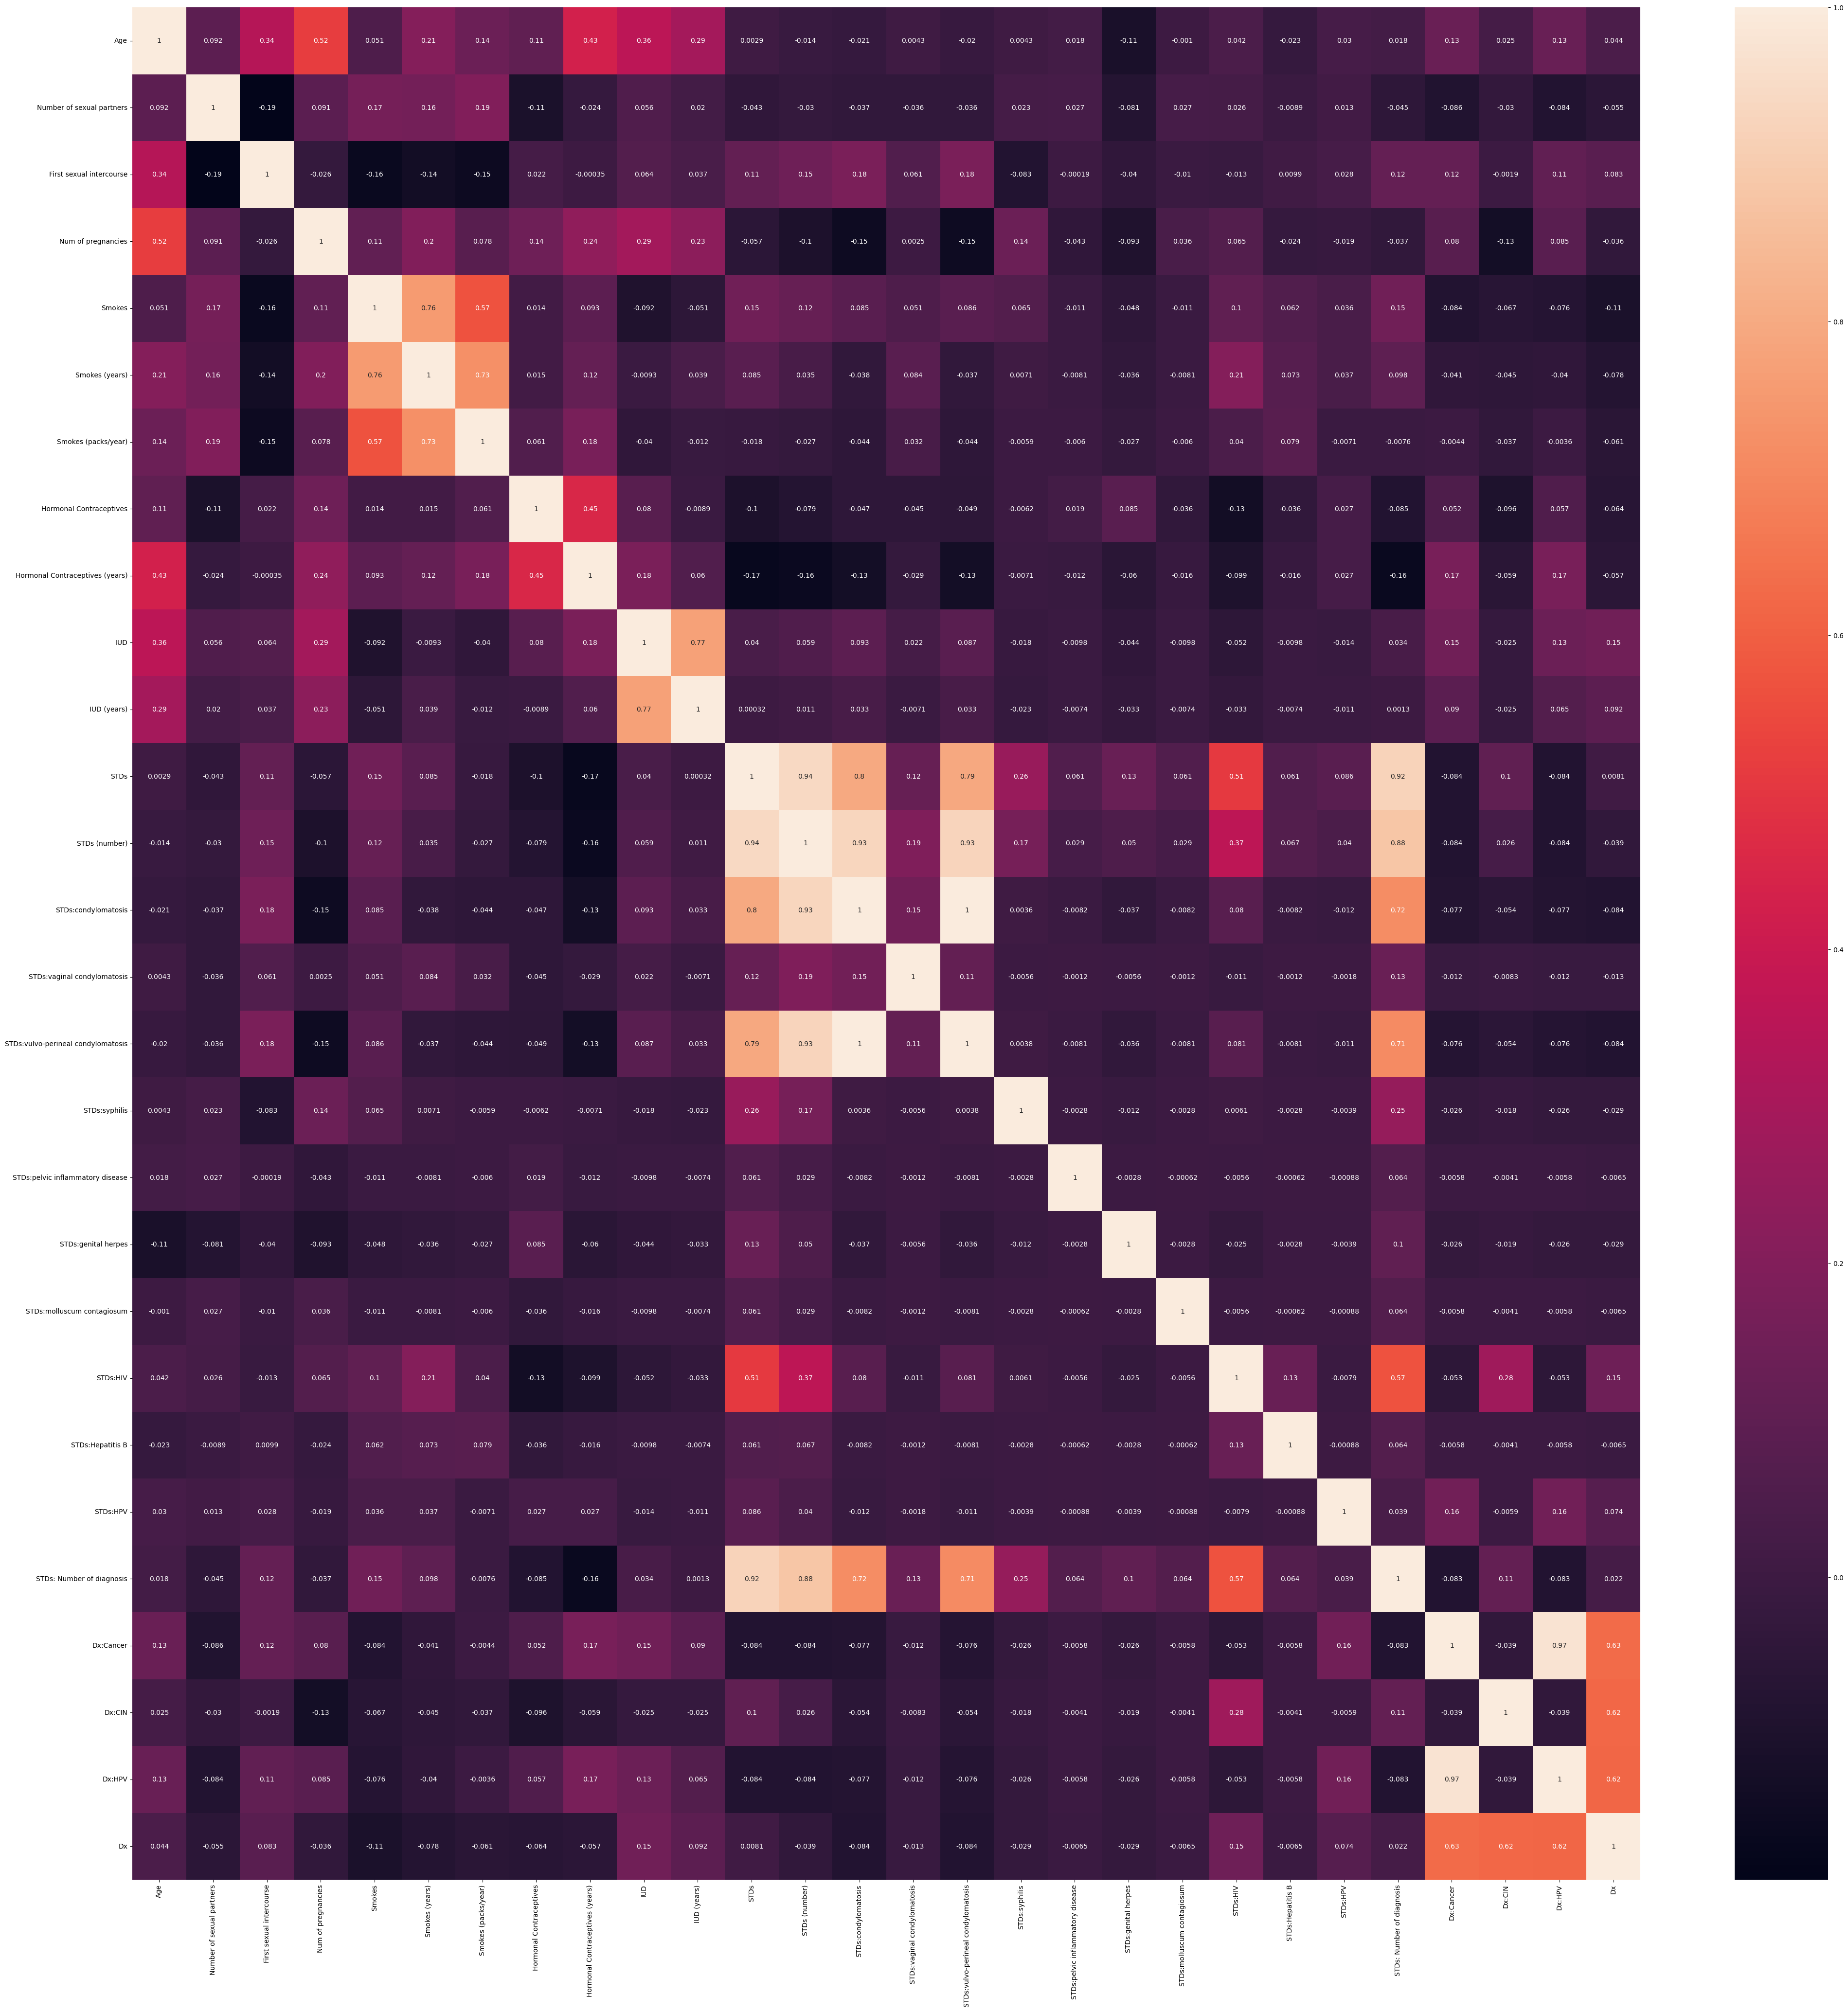

In [112]:
corr_matrix = X_train_resampled.corr()
plt.figure(figsize=(50, 50))
sns.heatmap(corr_matrix, annot=True)
plt.show()  

In [95]:
# svm_preds
# X_test_pca
# df['Citology']

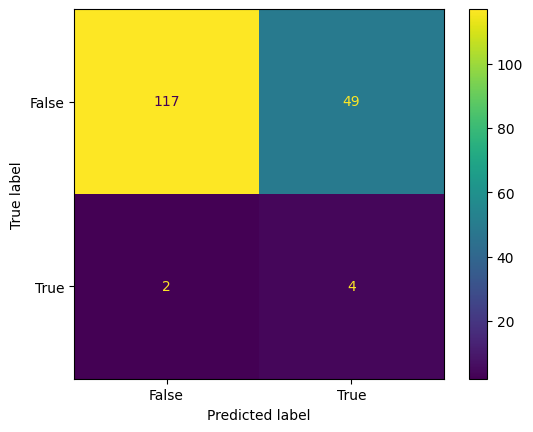

In [96]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,svm_preds)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

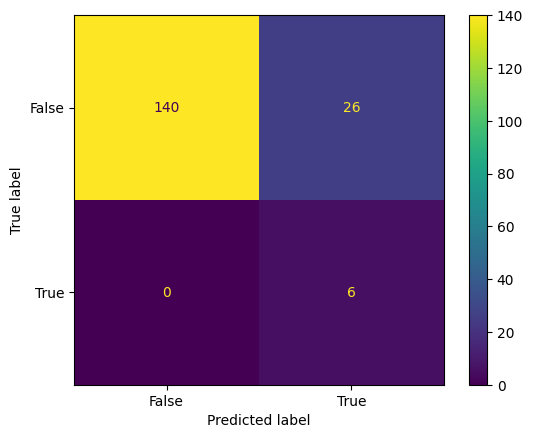

In [97]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,knn_preds)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [98]:
from imblearn.over_sampling import SMOTE
test = df.copy()
test = test.drop(['Citology','Schiller','Biopsy'],axis=1)
X = test.drop('Hinselmann', axis=1)
y = test['Hinselmann']
smote = SMOTE(random_state=40)
# X_resampled, y_resampled = smote.fit_resample(X, y)
# Split the resampled data into train and test sets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.decomposition import PCA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train_resampled,y_train_resampled = smote.fit_resample(X,y)
pca = PCA(n_components=26)
X_train_pca = pca.fit_transform(X_train_resampled)


# Train SVM
svm_model = SVC()
svm_model.fit(X_train_pca, y_train_resampled)

X_test_pca = pca.transform(X_test)
svm_preds = svm_model.predict(X_test_pca)
# Train KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_pca, y_train_resampled)
X_test_pca = pca.transform(X_test)

#predictions
knn_preds = knn_model.predict(X_test_pca)


# Calculate accuracy, precision, and recall for SVM
svm_accuracy = accuracy_score(y_test, svm_preds)
svm_precision = precision_score(y_test, svm_preds)
svm_recall = recall_score(y_test, svm_preds)

# Calculate accuracy, precision, and recall for KNN
knn_accuracy = accuracy_score(y_test, knn_preds)
knn_precision = precision_score(y_test, knn_preds)
knn_recall = recall_score(y_test, knn_preds)

# Print the results
print("SVM results:")
print("Accuracy: {:.4f}".format(svm_accuracy))
print("Precision: {:.4f}".format(svm_precision))
print("Recall: {:.4f}".format(svm_recall))
print()
print("KNN results:")
print("Accuracy: {:.4f}".format(knn_accuracy))
print("Precision: {:.4f}".format(knn_precision))
print("Recall: {:.4f}".format(knn_recall))


SVM results:
Accuracy: 0.6802
Precision: 0.1129
Recall: 1.0000

KNN results:
Accuracy: 0.9070
Precision: 0.3043
Recall: 1.0000


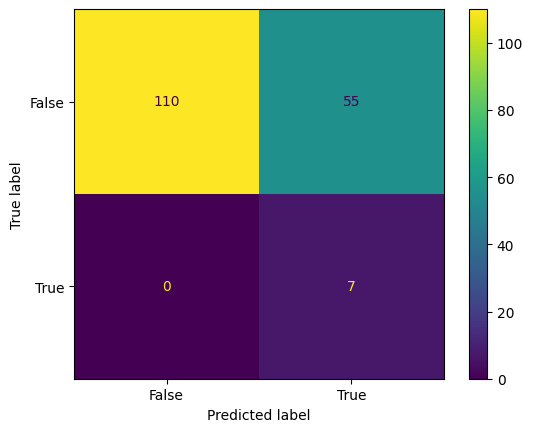

In [99]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,svm_preds)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

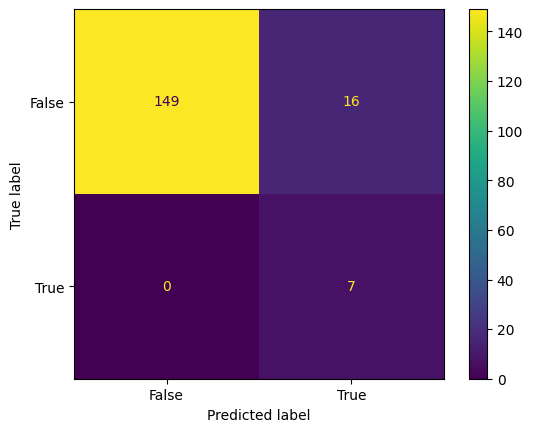

In [100]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,knn_preds)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [101]:
from imblearn.over_sampling import SMOTE
test = df.copy()
test = test.drop(['Hinselmann','Biopsy','Citology'],axis=1)
X = test.drop('Schiller', axis=1)
y = test['Schiller']
smote = SMOTE(random_state=40)
# X_resampled, y_resampled = smote.fit_resample(X, y)
# Split the resampled data into train and test sets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.decomposition import PCA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train_resampled,y_train_resampled = smote.fit_resample(X,y)

pca = PCA(n_components=26)
X_train_pca = pca.fit_transform(X_train_resampled)


# Train SVM
svm_model = SVC()
svm_model.fit(X_train_pca, y_train_resampled)

X_test_pca = pca.transform(X_test)
svm_preds = svm_model.predict(X_test_pca)
# Train KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_pca, y_train_resampled)
X_test_pca = pca.transform(X_test)

#predictions
knn_preds = knn_model.predict(X_test_pca)


# Calculate accuracy, precision, and recall for SVM
svm_accuracy = accuracy_score(y_test, svm_preds)
svm_precision = precision_score(y_test, svm_preds)
svm_recall = recall_score(y_test, svm_preds)

# Calculate accuracy, precision, and recall for KNN
knn_accuracy = accuracy_score(y_test, knn_preds)
knn_precision = precision_score(y_test, knn_preds)
knn_recall = recall_score(y_test, knn_preds)

# Print the results
print("SVM results:")
print("Accuracy: {:.4f}".format(svm_accuracy))
print("Precision: {:.4f}".format(svm_precision))
print("Recall: {:.4f}".format(svm_recall))
print()
print("KNN results:")
print("Accuracy: {:.4f}".format(knn_accuracy))
print("Precision: {:.4f}".format(knn_precision))
print("Recall: {:.4f}".format(knn_recall))


SVM results:
Accuracy: 0.8663
Precision: 0.3636
Recall: 0.4706

KNN results:
Accuracy: 0.8488
Precision: 0.3953
Recall: 1.0000


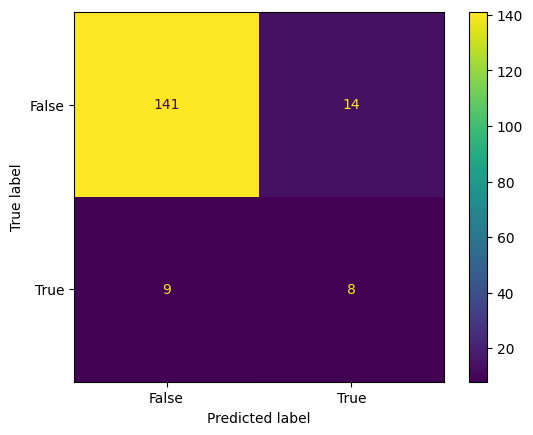

In [102]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,svm_preds)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

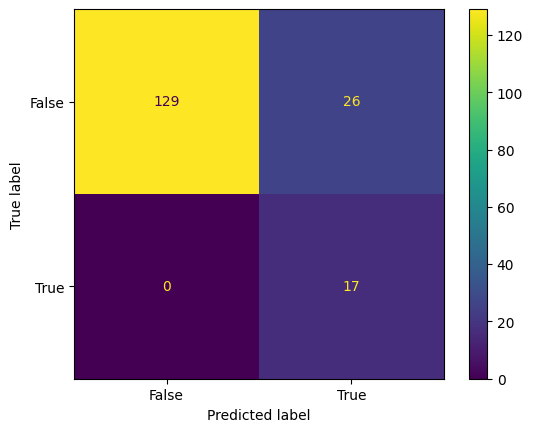

In [103]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,knn_preds)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [104]:
from imblearn.over_sampling import SMOTE
test = df.copy()
test = test.drop(['Hinselmann','Schiller','Citology'],axis=1)
X = test.drop('Biopsy', axis=1)
y = test['Biopsy']
smote = SMOTE(random_state=40)
# X_resampled, y_resampled = smote.fit_resample(X, y)
# Split the resampled data into train and test sets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.decomposition import PCA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train_resampled,y_train_resampled = smote.fit_resample(X,y)

pca = PCA(n_components=26)
X_train_pca = pca.fit_transform(X_train_resampled)


# Train SVM
svm_model = SVC()
svm_model.fit(X_train_pca, y_train_resampled)

X_test_pca = pca.transform(X_test)
svm_preds = svm_model.predict(X_test_pca)
# Train KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_pca, y_train_resampled)
X_test_pca = pca.transform(X_test)

#predictions
knn_preds = knn_model.predict(X_test_pca)


# Calculate accuracy, precision, and recall for SVM
svm_accuracy = accuracy_score(y_test, svm_preds)
svm_precision = precision_score(y_test, svm_preds)
svm_recall = recall_score(y_test, svm_preds)

# Calculate accuracy, precision, and recall for KNN
knn_accuracy = accuracy_score(y_test, knn_preds)
knn_precision = precision_score(y_test, knn_preds)
knn_recall = recall_score(y_test, knn_preds)

# Print the results
print("SVM results:")
print("Accuracy: {:.4f}".format(svm_accuracy))
print("Precision: {:.4f}".format(svm_precision))
print("Recall: {:.4f}".format(svm_recall))
print()
print("KNN results:")
print("Accuracy: {:.4f}".format(knn_accuracy))
print("Precision: {:.4f}".format(knn_precision))
print("Recall: {:.4f}".format(knn_recall))


SVM results:
Accuracy: 0.8721
Precision: 0.2500
Recall: 0.6000

KNN results:
Accuracy: 0.8488
Precision: 0.2778
Recall: 1.0000


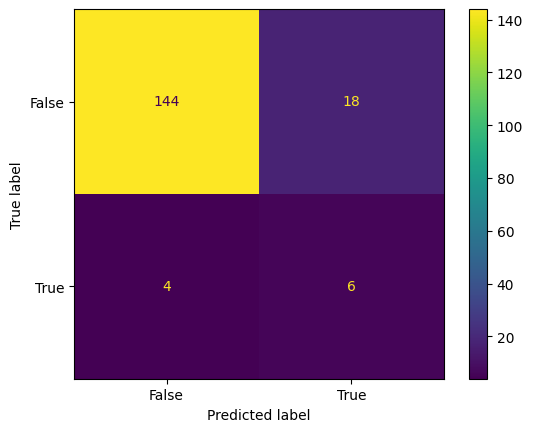

In [105]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,svm_preds)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

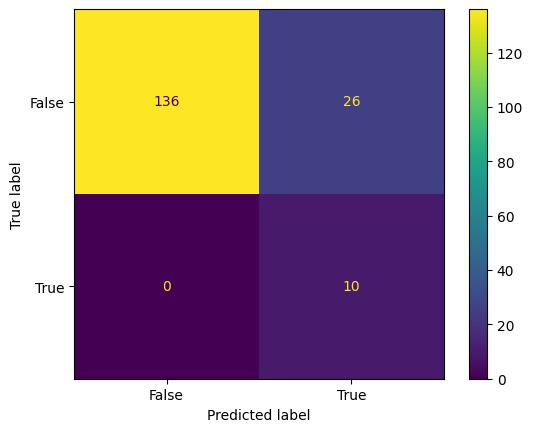

In [106]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,knn_preds)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()